In [1]:
import numpy as np
import cv2

%matplotlib inline
import matplotlib.pyplot as plt

dst(x,y) = \begin{cases}
 threshold  & \mbox{if } src(x,y) > thresh  \\
 maxval & otherwise
\end{cases}

In [2]:
image  = cv2.imread('image/table5.png')
result = image.copy()
gray   = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

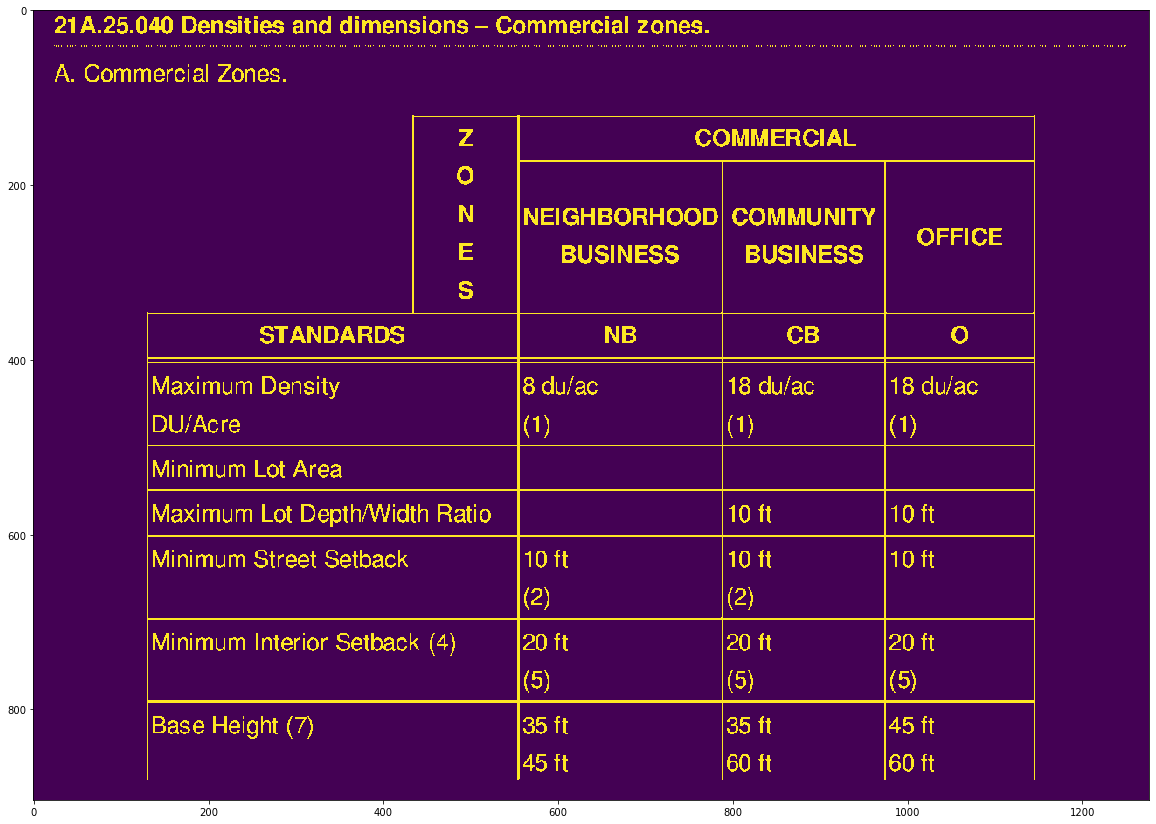

In [3]:
plt.figure(figsize=(20, 20))
plt.imshow(thresh)

### Remove horizontal lines

In [4]:
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (75,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

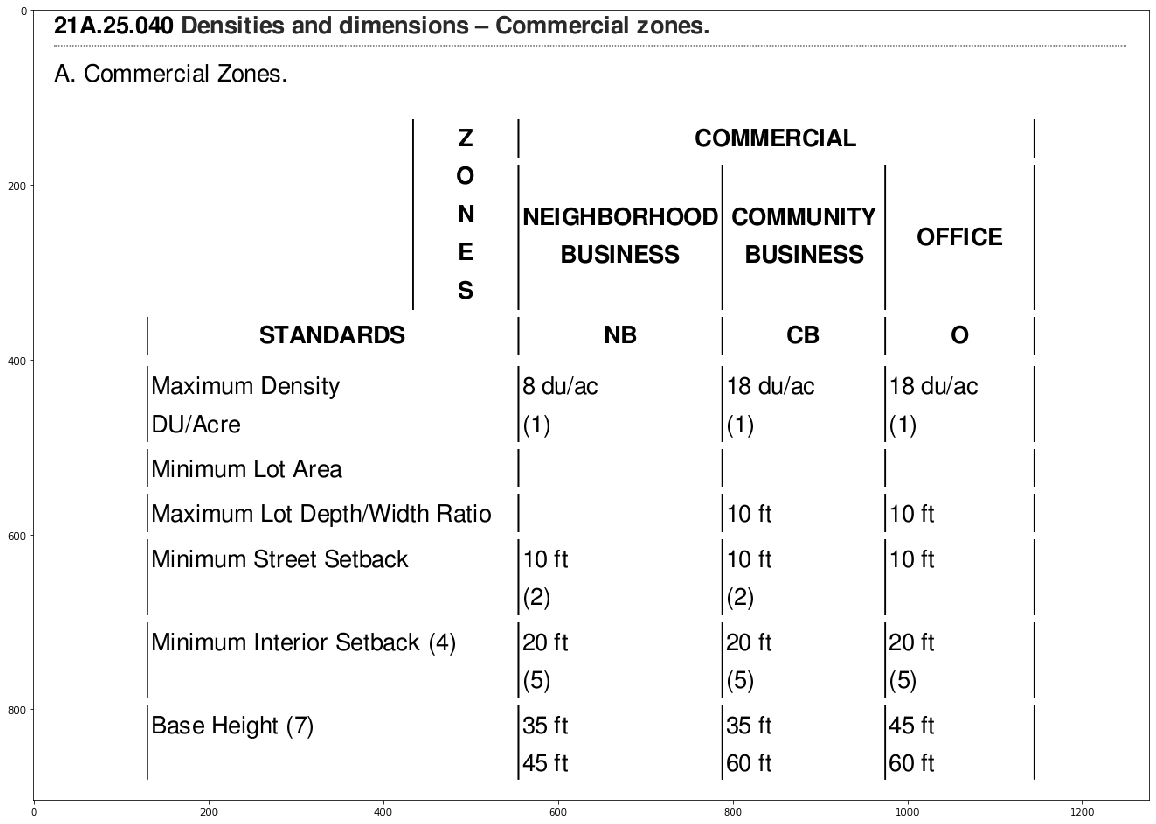

In [5]:
plt.figure(figsize=(20, 20))
plt.imshow(result)

### Remove vertical lines

In [6]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,75))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

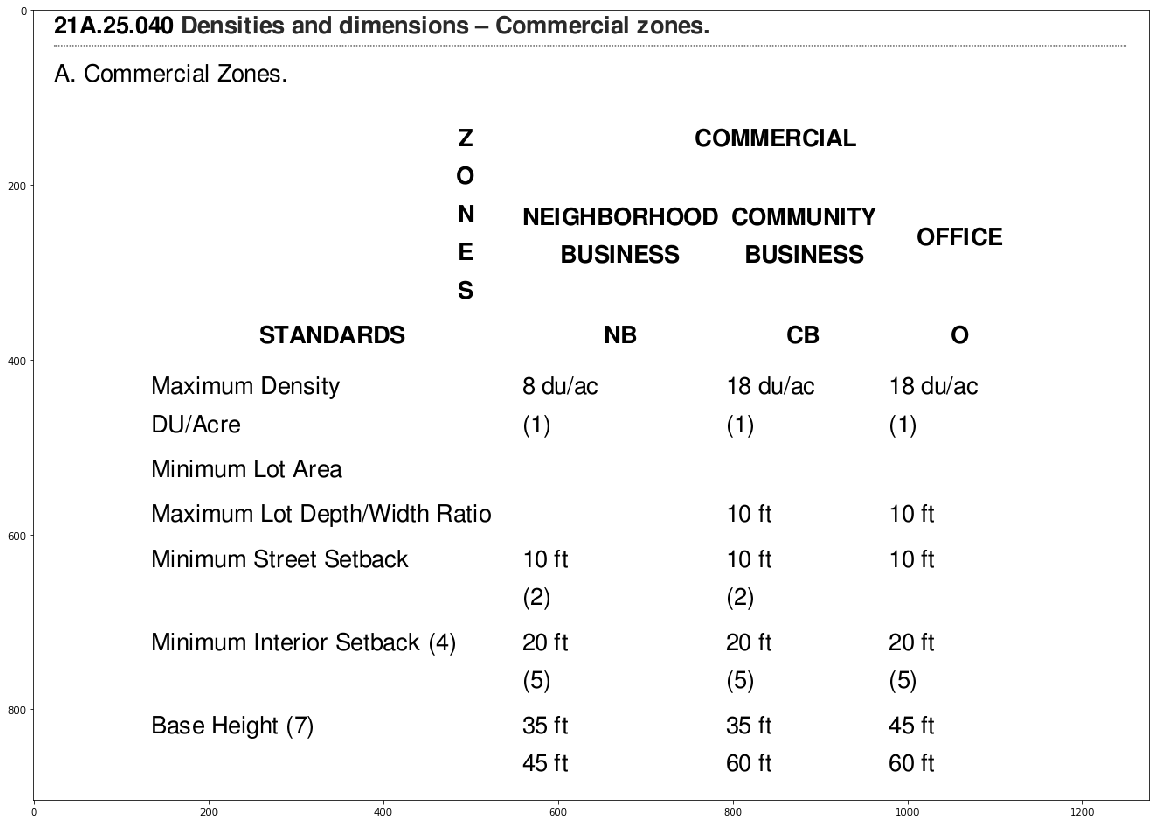

In [7]:
plt.figure(figsize=(20, 20))
plt.imshow(result)

In [8]:
kernel = np.ones((5,5), np.uint8) 

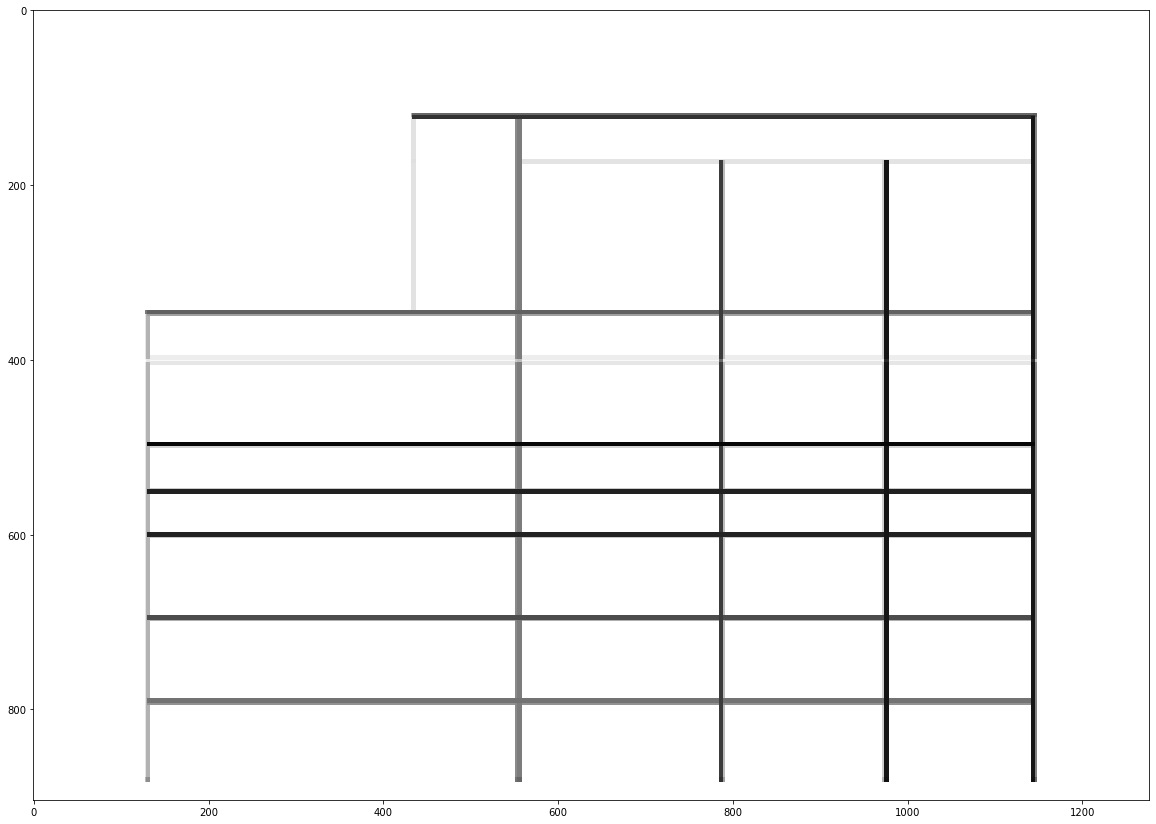

In [9]:
r = image - result

plt.figure(figsize=(20, 20))
plt.imshow(255 - cv2.dilate(r, kernel))

In [10]:
def Binarization(gray_img, threshold = 250):
    binarized = 1.0 * (gray_img > threshold)
    return binarized

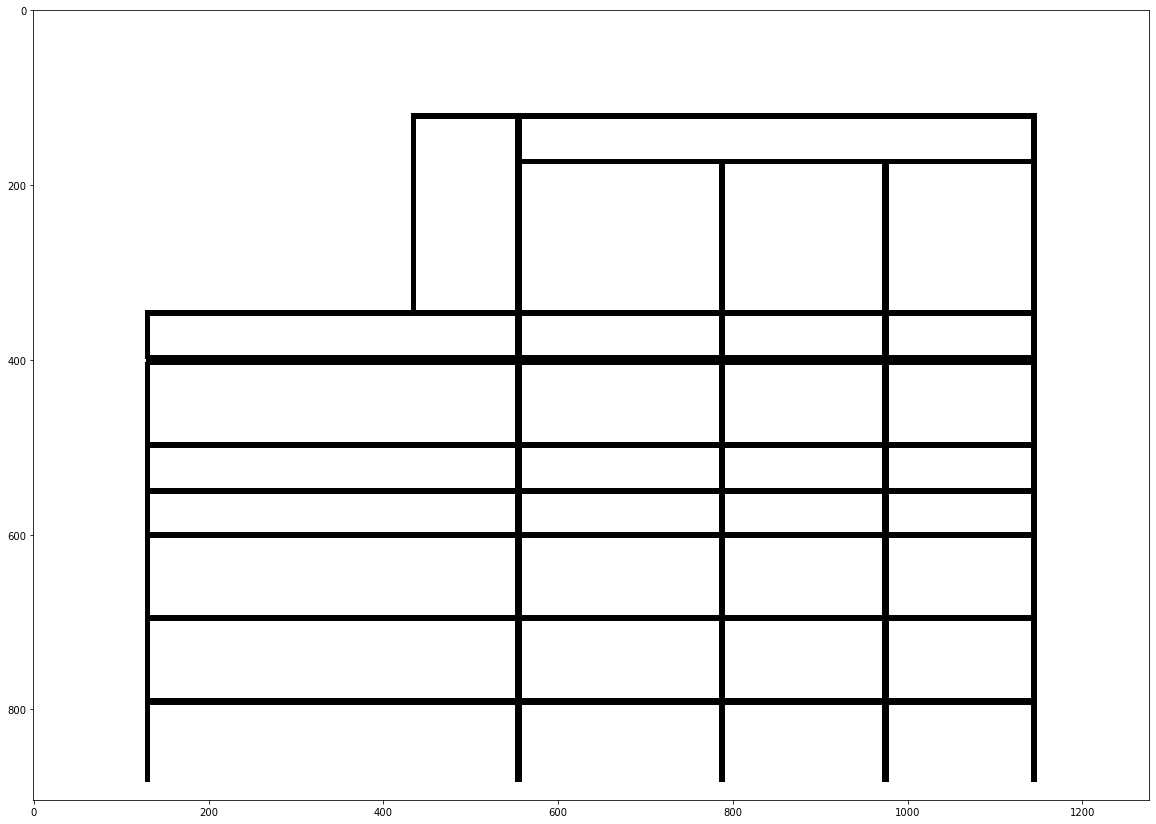

In [11]:
r = image - result

plt.figure(figsize=(20, 20))
plt.imshow(Binarization(255 - cv2.dilate(r, kernel)))